In [156]:
import nltk
import pandas as pd
import os
import re
import pickle
from nltk import FreqDist
import numpy as np
import google_conf
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)



from sklearn.metrics.pairwise import cosine_similarity

In [2]:
pop_data = google_conf.setup(sheet_url="https://docs.google.com/spreadsheets/d/1o8L0Rt4CzQ_DcYdaKgCdige4nJs0sydlTGiMBSstQtc/edit?usp=sharing", service_account_path="../../ServiceAccountsKey.json")

In [3]:
articles_metadata = pd.read_json("../data/article_metadata_with_filepaths.json")
articles_metadata.head(5)

year                 authors                            journal  \
0  2011              Bos et al.            Political Communication   
1  2019         Blassnig et al.            Political Communication   
2  2017                Caramani  American Political Science Review   
3  2020  Wuttke,Schimpf, Schoen  American Political Science Review   
4  2014                   Treib  Journal of European Public Policy   

                                               title     type pdf? keywords  \
0  How the Media Shape Perceptions of Right-Wing ...  article    y        y   
1  Hitting a Nerve: Populist News Articles Lead t...  article    y        y   
2  Will vs. Reason: The Populist and Technocratic...  article    y        y   
3  When the Whole Is Greater than the Sum of Its ...  article    y        y   
4  The voter says no, but nobody listens: causes ...  article    y        y   

  keywords_online? notes                                           filepath  \
0                y  None  [Political Communication/2011 - Bos et al. - H...   
1                y  None  [Political Communication/2019 - Blassing et al...   
2             None  None  [American Political Science Review/2017 - Cara...   
3             None  None  [American Political Science Review/2020 - Wutt...   
4             None  None  [Journal of European Public Policy/2014 - Trei...   

   pop_id  
0       0  
1       1  
2       2  
3       3  
4       4

In [4]:
articles_metadata["year"] = articles_metadata["year"].replace(3017, 2017)
articles_metadata

year                                authors  \
0    2011                             Bos et al.   
1    2019                        Blassnig et al.   
2    2017                               Caramani   
3    2020                 Wuttke,Schimpf, Schoen   
4    2014                                  Treib   
5    2016                                 Hobolt   
6    2018                         Kreuder-Sonnen   
7    2019                      McDonnell, Werner   
8    2019                                Schmidt   
9    2020                          Bakker et al.   
10   2020                          Bisbee et al.   
11   2020                               Escartin   
12   2020                     Spencer, Oppermann   
13   2018                               Lockwood   
14   2020                                  Huber   
15   2018                                Hurrell   
16   2015                       Verbeek, Zaslove   
17   2018                               Rooduijn   
18   2018                                Micozzi   
19   2018                           Bobba et al.   
20   2018                       Hameleers et al.   
21   2018                            Wirz et al.   
22   2019                               de Jonge   
23   2018                                Micozzi   
24   2020                              Pevehouse   
25   2012                      Nicholson, Segura   
26   2020                      Bertsou, Caramani   
27   2012                          Colburn, Cruz   
28   2012                       McCargo, Zarakol   
29   2013                            De la Torre   
30   2013                              Kornblith   
31   2013                                Mazzuca   
32   2013                                 Pappas   
33   2013                                Weyland   
34   2014                               Mietzner   
35   2016                     Fomina, Kucharczyk   
36   2016                         Church, Vatter   
37   2016                               Lochocki   
38   2016                                 Pappas   
39   2016                                 Reynié   
40   2016                                 Rupnik   
41   2017                              Applebaum   
42   2017                                   Fish   
43   2017                          Ford, Goodwin   
44   2017                              Gallagher   
45   2017                                Galston   
46   2017                                 Guelke   
47   2017                   Puddington, Roylance   
48   2017                               Qvortrup   
49   2017                                 Snyder   
50   2017                               Topaloff   
51   2018                            de la Torre   
52   2018                                Galston   
53   2018                                 Gamboa   
54   2018                              Margulies   
55   2018                         Mungiu-Pippidi   
56   2018                                 Pappas   
57   2018                                   Pehe   
58   2018                        Wike, Fetterolf   
59   2019                      Berman, Snegovaya   
60   2019                         Grzymala-Busse   
61   2019                          Hunter, Power   
62   2019                               Chamorel   
63   2019                                  Mudde   
64   2019                                 Pappas   
65   2019                                   Shah   
66   2019                               Thompson   
67   2020                   de Lara, de la Torre   
68   2020                                Diamond   
69   2020                               Fukuyama   
70   2020                                Krastev   
71   2020                          Kuisz, Wigura   
72   2020                                  Nodia   
73   2020                                 Pappas   
74   2020                                Repucci   
75   2020                                  Smith   
7

In [5]:
popid_year_dict = dict(zip(articles_metadata["pop_id"], articles_metadata["year"]))

In [6]:
# generating a new working title
articles_metadata["working_title"] = articles_metadata.apply(lambda row: row["authors"] + " " + str(row["year"]), axis=1)

In [7]:
title_freqs_dict = dict([el for el in FreqDist(articles_metadata["working_title"]).items() if el[1] > 1])
title_freqs_dict

{'Schmidt 2019': 2,
 'Rooduijn 2018': 2,
 'Micozzi 2018': 2,
 'Grzymala-Busse 2019': 4,
 'Marcos-Marne et al. 2020': 2,
 'Mudde 2014': 2,
 'Kriesi 2020': 2,
 'Rooduijn 2014': 2,
 'Jones 2019': 2}

In [8]:
letters = ["a", "b", "c", "d", "e"]
met = []
new_titles = []
for title in articles_metadata["working_title"]:
    if title in title_freqs_dict.keys():
        for n in range(title_freqs_dict[title]):
            letter = letters[n]
            title_letter = title + letter
            if title_letter not in met:
                new_titles.append(title_letter)
                met.append(title_letter)
                break
    else:
        new_titles.append(title)


In [9]:
articles_metadata["working_title"] = new_titles

In [10]:
popid_title_dict = dict(zip(articles_metadata["pop_id"], articles_metadata["working_title"]))

In [11]:
poptypes_df = pd.read_csv("../data/poptypes_df.csv")
poptypes_df["words"] = poptypes_df["words"].apply(eval)
poptypes_df

Unnamed: 0        poptype  count  proportion_pct  \
0           0     right-wing   2044       58.701895   
1           1      left-wing    611       17.547387   
2           2    nationalist    213        6.117174   
3           3       nativist     72        2.067777   
4           4        radical    105        3.015508   
5           5       moderate     42        1.206203   
6           6  authoritatian    156        4.480184   
7           7      inclusive     67        1.924182   
8           8      exclusive    110        3.159104   
9           9     neoliberal     62        1.780586   

                                               words  
0  [right-wing, right, right-, rightwe, radical-r...  
1  [left-wing, left, left-, leftist, radical-left...  
2  [nationalism, nationalist, national, nation, e...  
3                               [nativism, nativist]  
4                   [radical, radicalism, radically]  
5                             [moderate, moderately]  
6                  [authoritarian, authoritarianism]  
7               [inclusionary, inclusive, inclusion]  
8  [exclusionary, exclusion, exclusive, exclusive...  
9  [neoliberal, neo-liberal, Neoliberalism, neoli...

In [12]:
poptypes_dict = dict(zip(poptypes_df["poptype"], poptypes_df["words"]))
poptypes_dict

{'right-wing': ['right-wing',
  'right',
  'right-',
  'rightwe',
  'radical-right',
  'radical-right-wing',
  'far-right',
  'rightist',
  'right-leaning',
  'radicalright',
  'rightwing',
  'extreme-right',
  'farright'],
 'left-wing': ['left-wing',
  'left',
  'left-',
  'leftist',
  'radical-left',
  'leftwing',
  'left-leaning',
  'leftwe',
  'leftism',
  'center-left',
  'radicalleft'],
 'nationalist': ['nationalism',
  'nationalist',
  'national',
  'nation',
  'ethno-nationalist',
  'nationalistic',
  'neo-nationalism',
  'nationalisms'],
 'nativist': ['nativism', 'nativist'],
 'radical': ['radical', 'radicalism', 'radically'],
 'moderate': ['moderate', 'moderately'],
 'authoritatian': ['authoritarian', 'authoritarianism'],
 'inclusive': ['inclusionary', 'inclusive', 'inclusion'],
 'exclusive': ['exclusionary',
  'exclusion',
  'exclusive',
  'exclusively',
  'exclusionist'],
 'neoliberal': ['neoliberal',
  'neo-liberal',
  'Neoliberalism',
  'neoliberalism',
  'Neoliberal']}

In [13]:
poptypes = poptypes_df["poptype"].tolist()

In [14]:
path = "../data/large_data/populis_conc10_min/"
all_concs = []
for filename in os.listdir(path):
    try:
        pop_id = int(re.search("(\d+)(.txt)", filename).groups()[0])
        year = popid_year_dict[pop_id]
        title = popid_title_dict[pop_id]
        if ".txt" in filename:
            filepath = path + filename
            with open(filepath, "r") as f:
                lines = f.readlines()
            lines_splitted = [l.split() for l in lines]
            lines_splitted = [(conc, str(year), title) for conc in lines_splitted]
            all_concs.extend(lines_splitted)
    except:
        pass

In [15]:
middle = int((len(all_concs[0][0])) / 2)
middle

10

In [16]:
all_concs[0][0][middle]

'populism'

In [17]:
len(all_concs)

38422

In [18]:
concs_covered_types = []
for conc, year, title in all_concs:
    covered_types = []
    for key in poptypes_dict.keys():
        if set(poptypes_dict[key]) & set(conc):
            covered_types.append(key)
            conc = [w for w in conc if w not in poptypes_dict[key]]
    concs_covered_types.append((conc, covered_types, year, title))

In [19]:
concs_covered_types = []
for conc, year, title in all_concs:
    covered_types = []
    if len(conc) == 21:
        print(conc[9])
    for key in poptypes_dict.keys():
        if set(poptypes_dict[key]) & set(conc):
            covered_types.append(key)
            conc = [w for w in conc if w not in poptypes_dict[key]]
    concs_covered_types.append((conc, covered_types, year, title))

representation
particularly
support
discontent
anti-establishment
measure
exist
agreement
right
deﬁnition
aspect
vote
resistant
action
campaign
party
unashamedly
classical
market
analysis
overestimate
vulnerability
setting
society
rise
survival
tendency
democracy
contemporary
dictatorship
vulnerable
case
upsurge
contemporary
instance
impact
show
opening
give
absent
precondition
condition
hinder
precondition
beneﬁts
contrast
fail
vulnerable
opportunity
coincide
suggest
immunity
elect
windfall
condition
case
assess
instance
explain
condition
highlight
range
likelihood
argue
democracy
concern
nature
impact
populist
people
predominance
wonder
support
reason
decade
versus
constraint
promote
ﬁxed
setup
sneaky
allow
experience
parliament
democracy
turkish
include
include
hobble
slovak
right
survive
-
minimize
position
obstacle
contrast
tactic
tailor-made
permit
new
people
forward
step
death
american
politician
turn
neoliberal
numerous
authoritarianism
country
bolivarian
resistance
machination

In [20]:
concs_covered_types[:10]

[(['representation',
   'important',
   'electoral',
   'ramiﬁcation',
   'european',
   'democracy',
   'keyword',
   'political',
   'party',
   'representation',
   'populism',
   'research',
   'citizen',
   'satisfaction',
   'democracy',
   'diﬀerentiate',
   'inputoriente',
   'procedural',
   'aspect',
   'politic',
   'output-oriented'],
  [],
  '2020',
  'Bakker et al. 2020'),
 (['purpose',
   'immigration',
   'policy',
   'key',
   'component',
   'socio-cultural',
   'dimension',
   'european',
   'democracy',
   'particularly',
   'populist',
   'party',
   'scholar',
   'highlight',
   'immigration',
   'european',
   'integration',
   'particular',
   'political'],
  ['right-wing', 'radical'],
  '2020',
  'Bakker et al. 2020'),
 (['express',
   'cynicism',
   'resentment',
   'hatred',
   'democratic',
   'institution',
   'govern',
   'elite',
   'fuel',
   'support',
   'populism',
   'highlight',
   'mainstream',
   'party',
   'see',
   'vote',
   'share',
   'drop'

In [21]:
len([el for el in concs_covered_types if bool(el[1])])

12255

In [22]:
len([el for el in concs_covered_types if len(el[1])==1])

7455

In [23]:
concs_labeled = [(el[0], el[1][0], el[2], el[3]) for el in concs_covered_types if len(el[1])==1]
len(concs_labeled)

7455

In [24]:
concs_labeled[:5]

[(['legislative',
   'election',
   'substantial',
   'body',
   'research',
   'document',
   'connection',
   'political',
   'discontent',
   'populist',
   'voting',
   'expectation',
   'group',
   'relatively',
   'engaged',
   'voter',
   'non-abstaining',
   'mainstream',
   'party',
   'supporter'],
  'nationalist',
  '2020',
  'Bakker et al. 2020'),
 (['degree',
   'empirical',
   'validation',
   'latent',
   'disaﬀection',
   'measure',
   'disaﬀected',
   'regression',
   'propensity',
   'vote',
   'populist',
   'party',
   'mainstream',
   'voter',
   'error',
   'disaﬀection',
   'disaﬀection',
   'political',
   'interest',
   'prospective'],
  'nationalist',
  '2020',
  'Bakker et al. 2020'),
 (['show',
   'clear',
   'tendency',
   'populist',
   'chief',
   'executive',
   'fact',
   'strangle',
   'democracy',
   'populist',
   'wave',
   'engulf',
   'advanced',
   'industrialize',
   'country',
   'fear',
   'extend',
   'longstanding',
   'liberalpluralist',
  

In [25]:
with open("../data/concs_labeled_min.pickle", "wb") as f:
    pickle.dump(concs_labeled, f)

# Word explorations

In [26]:
concs_labeled_df = pd.DataFrame(concs_labeled, columns=["conc", "type", "year", "title"])

In [27]:
poptype = "left-wing"
subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]

def get_freqs_formatted(subset_df, n=100):
    subset_concs_flatten = [w for conc in subset_df["conc"] for w in conc if w not in ["populist", "populism"]]
    total = len(subset_concs_flatten)
    #freqdist_N = [(w + " ({})".format(str(np.round(count/total, 4)))) for w, count in FreqDist(subset_concs_flatten).most_common(n)]
    freqdist_N = [w for w, count in FreqDist(subset_concs_flatten).most_common(n)]
    return freqdist_N

In [28]:
poptypes_wordfreqs_dict = {}
for poptype in poptypes:
    subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]
    poptypes_wordfreqs_dict[poptype] = get_freqs_formatted(subset_df, n=100)

In [29]:
poptypes_wordfreqs_df = pd.DataFrame(poptypes_wordfreqs_dict)

In [30]:
poptypes_wordfreqs_df.head(10)

right-wing   left-wing nationalist      nativist     radical    moderate  \
0      party       party       party         party       party       party   
1  political   political      people        people   political      effect   
2     leader     support   political      movement   democracy    attitude   
3     people    economic   discourse     political      people       level   
4    support         new     politic      economic     politic  successful   
5  democracy      policy       elite  mobilization        case        case   
6     effect    attitude    economic      ideology  democratic   political   
7      study        case    election          year         new       actor   
8   attitude      people       level       support    analysis     support   
9      voter  government   different          case  mainstream  government   

  authoritatian   inclusive  exclusive    neoliberal  
0     democracy       party      party     political  
1     political   political  political         party  
2    democratic  democratic     people       politic  
3        regime      people    politic      economic  
4   competitive         way       case        policy  
5         party   democracy      elite         state  
6        leader       group   movement      ideology  
7         power      effect  discourse  contemporary  
8       politic   discourse      actor      japanese  
9        people     politic      group        social

In [31]:
poptypes_wordfreqs_df.to_csv("../data/poptypes_wordfreqs_df")

In [32]:
#google_conf.set_with_dataframe(pop_data.add_worksheet("poptypes_wordfreqs_df", 1,1), poptypes_wordfreqs_df)

In [33]:
poptype = "left-wing"
subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]

def get_freqs_vals(subset_df):
    subset_concs_flatten = [w for conc in subset_df["conc"] for w in conc if w not in ["populist", "populism"]]
    total = len(subset_concs_flatten)
    freqdist_N = dict([(w, count/total) for w, count in FreqDist(subset_concs_flatten).most_common()])
    # freqdist_N = [w for w, count in FreqDist(subset_concs_flatten).most_common(n)]
    return freqdist_N

In [34]:
get_freqs_vals(subset_df)

{'party': 0.0318073033274145,
 'political': 0.011117115726086622,
 'support': 0.008646645564734039,
 'economic': 0.00818343240948043,
 'new': 0.0062533775959237245,
 'policy': 0.00602177101829692,
 'attitude': 0.005790164440670115,
 'case': 0.005558557863043311,
 'people': 0.0053269512854165054,
 'government': 0.00517254690033197,
 'politic': 0.005095344707789701,
 'position': 0.004632131552536092,
 'social': 0.004554929359993824,
 'democracy': 0.004477727167451556,
 'voter': 0.004323322782367019,
 'leader': 0.004246120589824751,
 'ideology': 0.004014514012197946,
 'effect': 0.003937311819655678,
 'focus': 0.003782907434571142,
 'study': 0.0037057052420288736,
 'discourse': 0.0037057052420288736,
 'issue': 0.0035513008569443374,
 'form': 0.003474098664402069,
 'election': 0.0033968964718598007,
 'ideological': 0.0033968964718598007,
 'country': 0.0033196942793175324,
 'movement': 0.0033196942793175324,
 'elite': 0.0032424920867752645,
 'different': 0.0032424920867752645,
 'vote': 0.003

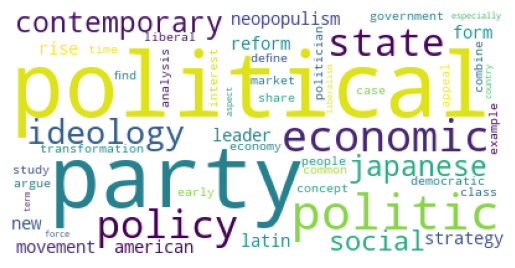

In [53]:
wc = WordCloud(max_words=50, background_color="white", relative_scaling=0.5)
wc.generate_from_frequencies(get_freqs_vals(subset_df))
plt.imshow(wc)  # , interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
plt.imshow(wc) # , interpolation="bilinear")
plt.axis("off")
plt.show()

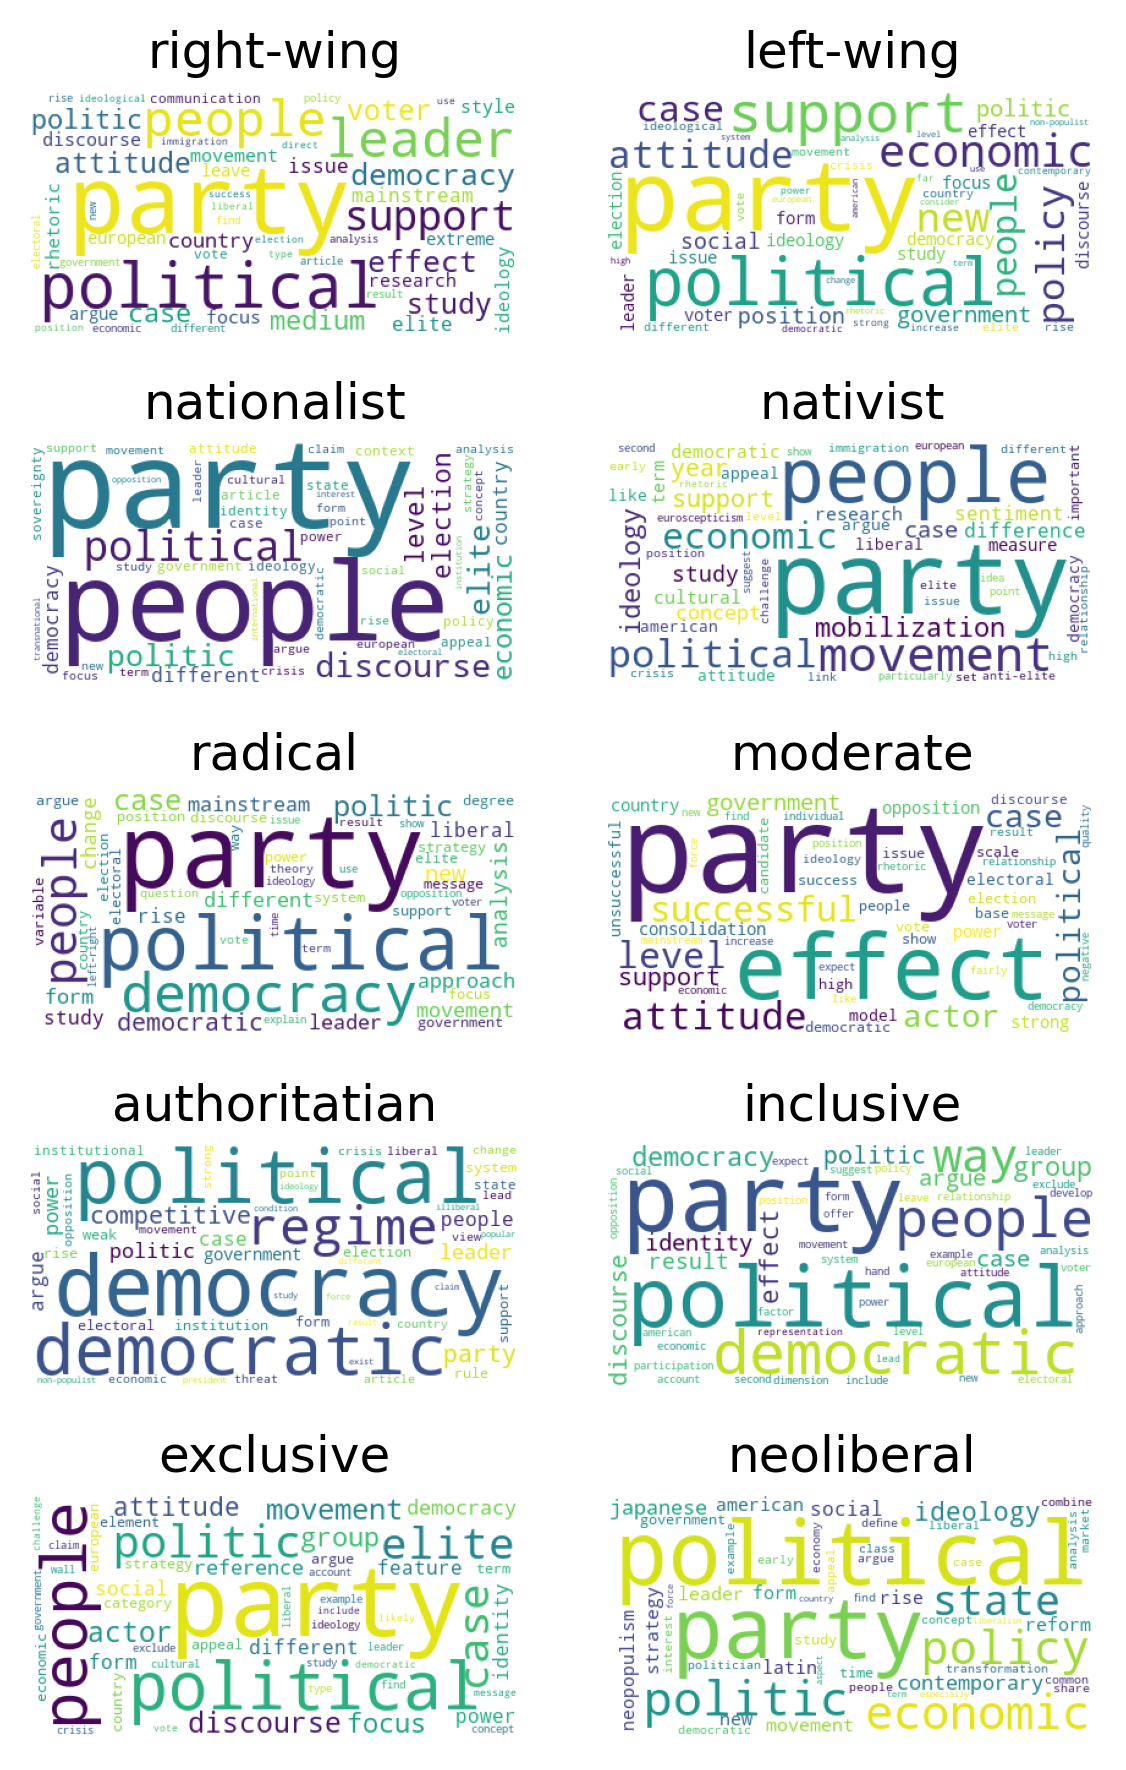

In [50]:
fig, axs = plt.subplots(5,2, figsize=(4,6), dpi=300,tight_layout=True)
for ax, poptype in zip(axs.ravel(), poptypes):
    subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]
    wc = WordCloud(max_words=50, background_color="white")
    wc.generate_from_frequencies(get_freqs_vals(subset_df))
    ax.imshow(wc) # , interpolation="bilinear")
    ax.axis("off")
    ax.set_title(poptype)

In [35]:
freqs_vals_dict = {}
for poptype in poptypes:
    subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]
    freqs_vals_dict[poptype] = get_freqs_vals(subset_df)
freqs_vals_df = pd.DataFrame(freqs_vals_dict).fillna(0)
freqs_vals_df[1500:1510]

right-wing  left-wing  nationalist  nativist   radical  \
thrive              0.000106   0.000154     0.000267  0.000000  0.000203   
populist-party      0.000106   0.000000     0.000000  0.000000  0.000000   
cater               0.000106   0.000000     0.000000  0.000000  0.000000   
individual-level    0.000106   0.000154     0.000033  0.000000  0.000203   
lie                 0.000106   0.000309     0.000367  0.000291  0.000305   
crime               0.000106   0.000077     0.000134  0.000000  0.000000   
remarkable          0.000106   0.000154     0.000100  0.000291  0.000000   
attitudinal         0.000106   0.000232     0.000067  0.000873  0.000203   
mind                0.000106   0.000077     0.000033  0.000582  0.000203   
organizational      0.000106   0.000309     0.000067  0.000582  0.000203   

                  moderate  authoritatian  inclusive  exclusive  neoliberal  
thrive            0.000457       0.000000   0.000000   0.000000    0.000000  
populist-party    0.000228       0.000000   0.000000   0.000000    0.000000  
cater             0.000228       0.000000   0.000000   0.000000    0.000000  
individual-level  0.000000       0.000000   0.000000   0.000000    0.000000  
lie               0.000000       0.000344   0.000000   0.000144    0.000000  
crime             0.000000       0.000086   0.000000   0.000000    0.000232  
remarkable        0.000000       0.000086   0.000000   0.000000    0.000000  
attitudinal       0.000228       0.000000   0.000000   0.000000    0.000000  
mind              0.000000       0.000000   0.000262   0.000289    0.000463  
organizational    0.000000       0.000000   0.000524   0.000000    0.000000

In [161]:
freqs_cossim = pd.DataFrame(cosine_similarity(freqs_vals_df.T).round(2), columns=poptypes, index=poptypes)
freqs_cossim

right-wing  left-wing  nationalist  nativist  radical  \
right-wing           1.00       0.92         0.83      0.75     0.91   
left-wing            0.92       1.00         0.84      0.75     0.90   
nationalist          0.83       0.84         1.00      0.77     0.83   
nativist             0.75       0.75         0.77      1.00     0.73   
radical              0.91       0.90         0.83      0.73     1.00   
moderate             0.82       0.81         0.67      0.62     0.77   
authoritatian        0.65       0.66         0.72      0.59     0.70   
inclusive            0.78       0.79         0.81      0.69     0.81   
exclusive            0.82       0.80         0.88      0.75     0.83   
neoliberal           0.68       0.74         0.75      0.64     0.71   

               moderate  authoritatian  inclusive  exclusive  neoliberal  
right-wing         0.82           0.65       0.78       0.82        0.68  
left-wing          0.81           0.66       0.79       0.80        0.74  
nationalist        0.67           0.72       0.81       0.88        0.75  
nativist           0.62           0.59       0.69       0.75        0.64  
radical            0.77           0.70       0.81       0.83        0.71  
moderate           1.00           0.51       0.68       0.66        0.52  
authoritatian      0.51           1.00       0.70       0.67        0.64  
inclusive          0.68           0.70       1.00       0.79        0.68  
exclusive          0.66           0.67       0.79       1.00        0.69  
neoliberal         0.52           0.64       0.68       0.69        1.00

In [181]:
freqs_vals_weighted_df = pd.DataFrame()
for poptype in poptypes:
    freqs_vals_weighted_df[poptype] = freqs_vals_df.apply(lambda row: row[poptype] * np.log(11 / len([val for val in row if val > 0])), axis=1)

In [182]:
freqs_vals_weighted_df

right-wing  left-wing  nationalist  nativist   radical  \
party            0.003531   0.003032     0.001585  0.001748  0.003441   
political        0.001166   0.001060     0.001225  0.000749  0.001580   
leader           0.000785   0.000405     0.000290  0.000111  0.000417   
people           0.000728   0.000508     0.001295  0.000888  0.000630   
support          0.000651   0.000824     0.000271  0.000527  0.000349   
...                   ...        ...          ...       ...       ...   
vogue            0.000000   0.000000     0.000000  0.000000  0.000000   
ponder           0.000000   0.000000     0.000000  0.000000  0.000000   
stratiﬁcation    0.000000   0.000000     0.000000  0.000000  0.000000   
unfashionable    0.000000   0.000000     0.000000  0.000000  0.000000   
neo              0.000000   0.000000     0.000000  0.000000  0.000000   

               moderate  authoritatian  inclusive  exclusive  neoliberal  
party          0.003981       0.000917   0.001924   0.002106    0.001436  
political      0.000827       0.001212   0.001449   0.001514    0.001546  
leader         0.000065       0.000663   0.000350   0.000303    0.000442  
people         0.000413       0.000573   0.000800   0.001349    0.000287  
support        0.000653       0.000393   0.000225   0.000124    0.000177  
...                 ...            ...        ...        ...         ...  
vogue          0.000000       0.000000   0.000000   0.000000    0.000556  
ponder         0.000000       0.000000   0.000000   0.000000    0.000556  
stratiﬁcation  0.000000       0.000000   0.000000   0.000000    0.000556  
unfashionable  0.000000       0.000000   0.000000   0.000000    0.000556  
neo            0.000000       0.000000   0.000000   0.000000    0.000556  

[9392 rows x 10 columns]

In [183]:
s = freqs_vals_weighted_df[poptype]
s_norm = s.apply(lambda x: ((x / s.max()) + 1) / 2)
s_norm


party            0.643532
political        0.654573
leader           0.544164
people           0.528706
support          0.517666
                   ...   
vogue            0.555556
ponder           0.555556
stratiﬁcation    0.555556
unfashionable    0.555556
neo              0.555556
Name: neoliberal, Length: 9392, dtype: float64

In [184]:
cmap = matplotlib.cm.get_cmap('Greys')

In [185]:
matplotlib.colors.to_hex(cmap(s_norm["attitude"]))

'#959595'

In [186]:
cmap = matplotlib.cm.get_cmap('Greys')
s = freqs_vals_weighted_df[poptype]
s_norm = s.apply(lambda x: ((x / s.max()) + 1) / 2)
def image_colors(word, font_size, position, orientation, random_state, font_path):
    color = matplotlib.colors.to_hex(cmap(s_norm[word]))
    return color

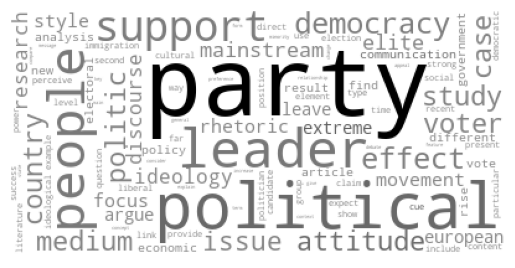

In [187]:
poptype = "right-wing"
subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]
s = freqs_vals_weighted_df[poptype]
s_norm = s.apply(lambda x: ((x / s.max()) + 1) / 2)
wc = WordCloud(max_words=100, background_color="white", relative_scaling=0.5)
wc.generate_from_frequencies(get_freqs_vals(subset_df))
wc.recolor(color_func=image_colors)
plt.imshow(wc)  # , interpolation="bilinear")
plt.axis("off")
plt.show()

In [201]:
dict([el for el in get_freqs_vals(subset_df).items()][5:])

{'state': 0.00764774044032445,
 'ideology': 0.006488991888760139,
 'contemporary': 0.006257242178447277,
 'japanese': 0.006257242178447277,
 'social': 0.005561993047508691,
 'neopopulism': 0.0050984936268829665,
 'new': 0.004866743916570104,
 'rise': 0.004866743916570104,
 'reform': 0.004634994206257242,
 'leader': 0.004634994206257242,
 'movement': 0.00440324449594438,
 'form': 0.00440324449594438,
 'strategy': 0.004171494785631518,
 'latin': 0.004171494785631518,
 'american': 0.004171494785631518,
 'government': 0.004171494785631518,
 'study': 0.0039397450753186555,
 'time': 0.0037079953650057938,
 'transformation': 0.0037079953650057938,
 'politician': 0.0034762456546929316,
 'concept': 0.0032444959443800694,
 'analysis': 0.0032444959443800694,
 'democratic': 0.0032444959443800694,
 'ﬁnd': 0.0032444959443800694,
 'liberal': 0.0030127462340672076,
 'deﬁne': 0.0030127462340672076,
 'economy': 0.0030127462340672076,
 'interest': 0.0030127462340672076,
 'example': 0.0030127462340672076,

In [210]:
import nltk

In [222]:
to_remove = [tup[0] for tup in nltk.FreqDist([w for conc in concs_labeled_df["conc"] for w in conc]).most_common(10)]
to_remove

['populist',
 'populism',
 'party',
 'political',
 'people',
 'democracy',
 'politic']

In [223]:
subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]
subset_df

conc        type  year  \
29    [soon, country, hold, new, presidential, elect...  neoliberal  2020   
81    [attention, liberal, democracy, oligarchic, co...  neoliberal  2019   
82    [democracy, oligarchic, component, damage, wor...  neoliberal  2019   
187   [chavista, engineer, passive, revolution, fact...  neoliberal  2014   
188   [dominant, class, arrangement, maintain, equil...  neoliberal  2014   
221   [vice, versa, necessarily, explicit, categoriz...  neoliberal  2019   
222   [categorization, argue, latin, american, compa...  neoliberal  2019   
223   [point, clear, latin, american, country, fact,...  neoliberal  2019   
287   [employ, treat, populism, ideology, reiterate,...  neoliberal  2016   
289   [employ, treat, populism, ideology, reiterate,...  neoliberal  2016   
296   [remain, populism, thin-centered, ideology, li...  neoliberal  2016   
297   [routinely, associate, ﬁscally, irresponsible,...  neoliberal  2016   
303   [remain, populism, thin-centered, ideology, li...  neoliberal  2016   
304   [routinely, associate, ﬁscally, irresponsible,...  neoliberal  2016   
322   [early, latin, american, socialist, liberal, i...  neoliberal  2012   
343   [document, seek, present, party, mainstream, c...  neoliberal  2011   
344   [centre-right, force, bring, peripheral, aspec...  neoliberal  2011   
345   [aspect, populism, come, relationship, state, ...  neoliberal  2011   
346   [state, economy, populist, movement, protectio...  neoliberal  2011   
347   [catch-all, politician, populism, elucidate, e...  neoliberal  2011   
348   [crime, security, prominent, frame, anti-burea...  neoliberal  2011   
498   [bear, accord, precisely, time, monster, today...  neoliberal  2012   
506   [party, form, response, consensus, exacerbate,...  neoliberal  2019   
519   [deﬁne, opposition, corrupt, elite, distributi...  neoliberal  2020   
520   [latin, american, populist, president, decade,...  neoliberal  2020   
575   [give, root, communist, post-communist, party,...  neoliberal  2020   
576   [wonder, populism, add, thick, ideological, pr...  neoliberal  2020   
766   [populism, dominant, party, populist, discours...  neoliberal  2016   
767   [economist, wing, conceal, economic, agenda, a...  neoliberal  2016   
1045  [transition, import-substitution, industrializ...  neoliberal  2011   
1046  [client, patron, practice, oppose, citizen, re...  neoliberal  2011   
1047  [value, tool, political, analysis, confront, p...  neoliberal  2011   
1048  [political, analysis, confront, political, pro...  neoliberal  2011   
1479  [government, initiative, redress, inequality, ...  neoliberal  2014   
1480  [high, inequality, result, great, redistributi...  neoliberal  2014   
1484  [increase, income, cost, collection, administr...  neoliberal  2014   
1486  [high, level, inequality, redistribute, little...  neoliberal  2014   
1487  [start, pay, attention, furthermore, latin, am...  neoliberal  2014   
1488  [de-democratization, managerialism, seek, limi...  neoliberal  2020   
1517  [today, largely, reaction, social, dislocation...  neoliberal  2017   
1518  [tie, process, globalisation, concept, populis...  neoliberal  2017   
1519  [affect, express, term, identity, politic, pol...  neoliberal  2017   
1520  [politic, political, strategy, shift, social, ...  neoliberal  2017   
1523  [part, world, instead, seek, add, substantivel...  neoliberal  2017   
1524  [politic, today, spite, diverse, manifestation...  neoliberal  2017   
1532  [article, volume, strongly, graft, agenda, ref...  neoliberal  2017   
1540  [classic, form, address, wake, deep, change, o...  neoliberal  2017   
1541  [social, mobilisation, usually, identify, new,...  neoliberal  2017   
1567  [individualisation, mental, manual-labour, div...  neoliberal  2015   
1569  [precisely, under-theorisation, contemporary, ...  neoliberal  2015   
1570  [class, phenomenon, define, relatively, pure, ...  neoliberal  2015   
1571  [articulate, nascent, threat, step, concr

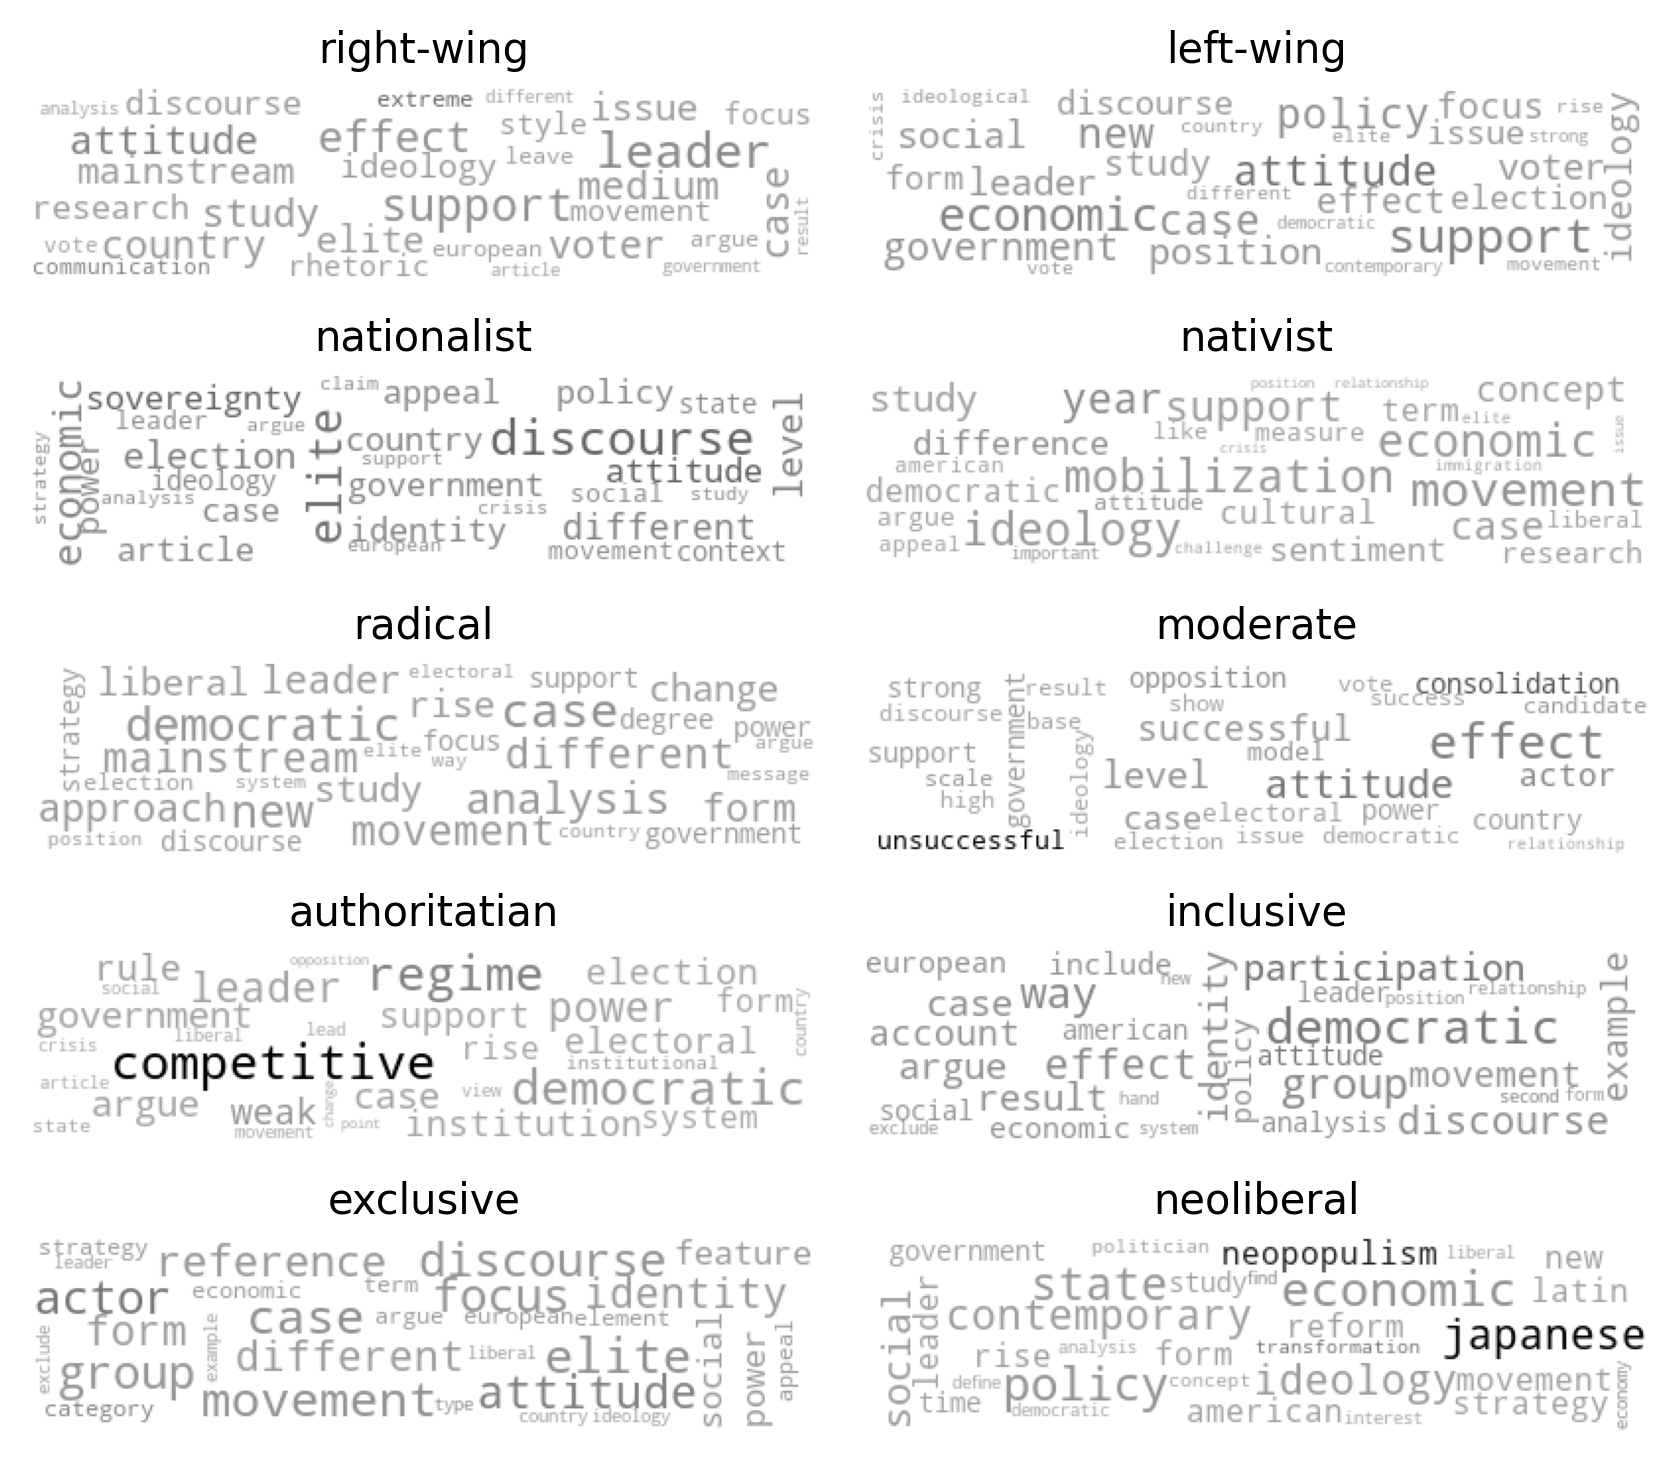

In [224]:
fig, axs = plt.subplots(5,2, figsize=(5.7,5), dpi=300,tight_layout=True)
for ax, poptype in zip(axs.ravel(), poptypes):
    subset_df = concs_labeled_df[concs_labeled_df["type"]==poptype]
    s = freqs_vals_weighted_df[poptype]
    s_norm = s.apply(lambda x: ((x / s.max()) + 0.7) / 1.7)
    wc = WordCloud(max_words=30, background_color="white", width=400, height=100, max_font_size=25)
    freqs = dict([el for el in get_freqs_vals(subset_df).items() if el[0] not in to_remove])
    wc.generate_from_frequencies(freqs)
    wc.recolor(color_func=image_colors)
    ax.imshow(wc) # , interpolation="bilinear")
    ax.axis("off")
    ax.set_title(poptype, size=10)

In [225]:
fig.savefig("../figures/wordcloud_v1.png")

In [155]:
tiidf_cossim = pd.DataFrame(cosine_similarity(freqs_vals_weighted_df.T).round(2), columns=poptypes, index=poptypes)
tiidf_cossim

right-wing  left-wing  nationalist  nativist  radical  \
right-wing           1.00       0.29         0.33      0.11     0.22   
left-wing            0.29       1.00         0.23      0.08     0.18   
nationalist          0.33       0.23         1.00      0.13     0.20   
nativist             0.11       0.08         0.13      1.00     0.08   
radical              0.22       0.18         0.20      0.08     1.00   
moderate             0.16       0.11         0.10      0.04     0.07   
authoritatian        0.18       0.13         0.17      0.06     0.12   
inclusive            0.14       0.12         0.14      0.04     0.11   
exclusive            0.19       0.12         0.18      0.06     0.12   
neoliberal           0.10       0.08         0.11      0.04     0.08   

               moderate  authoritatian  inclusive  exclusive  neoliberal  
right-wing         0.16           0.18       0.14       0.19        0.10  
left-wing          0.11           0.13       0.12       0.12        0.08  
nationalist        0.10           0.17       0.14       0.18        0.11  
nativist           0.04           0.06       0.04       0.06        0.04  
radical            0.07           0.12       0.11       0.12        0.08  
moderate           1.00           0.06       0.06       0.06        0.03  
authoritatian      0.06           1.00       0.08       0.09        0.06  
inclusive          0.06           0.08       1.00       0.08        0.05  
exclusive          0.06           0.09       0.08       1.00        0.06  
neoliberal         0.03           0.06       0.05       0.06        1.00

<AxesSubplot: >

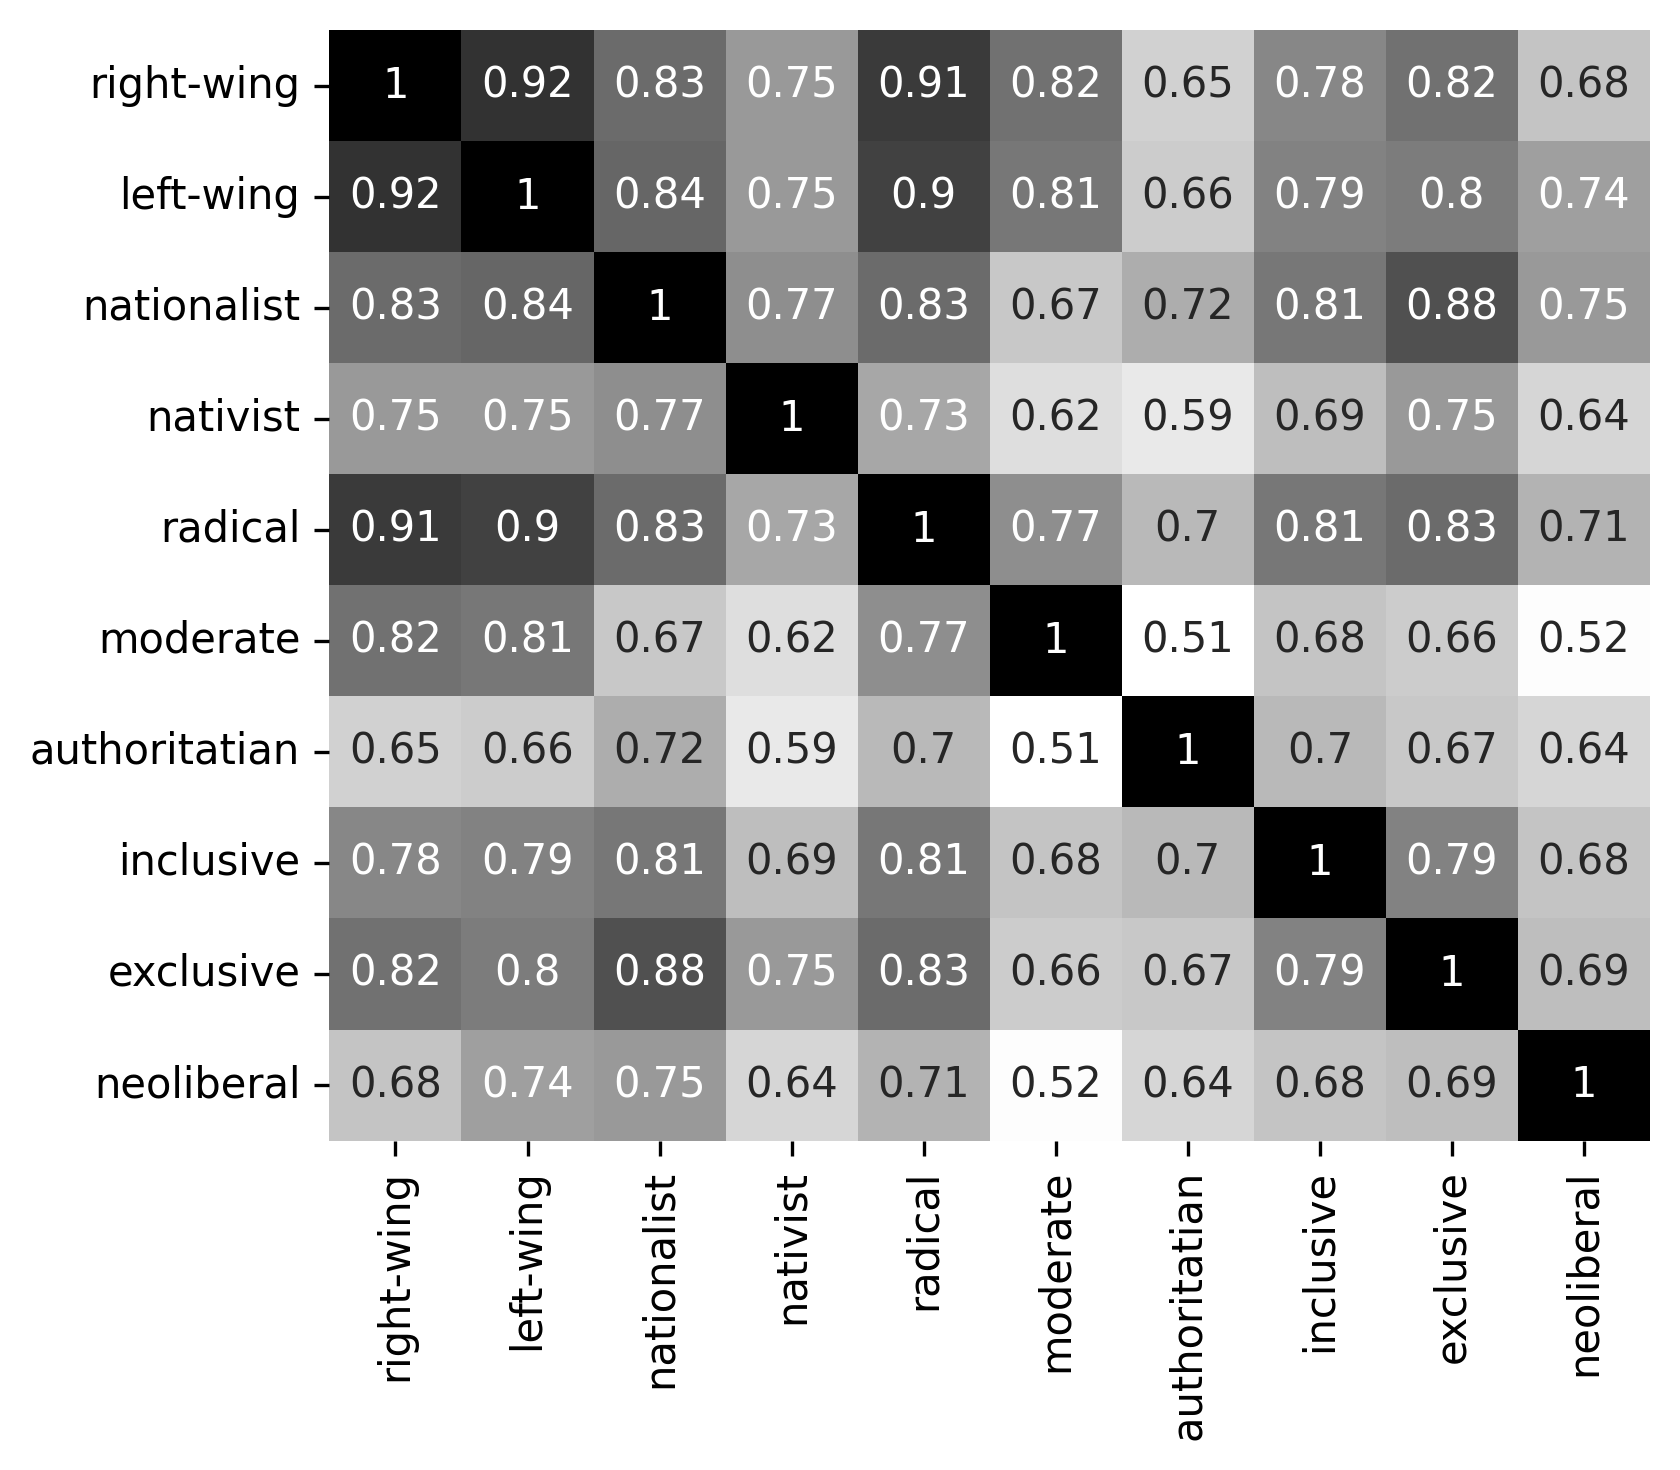

In [162]:
fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)
sns.heatmap(freqs_cossim, annot=True, cbar=None, cmap="Greys") #  , fmt='d', ax=ax)

<AxesSubplot: >

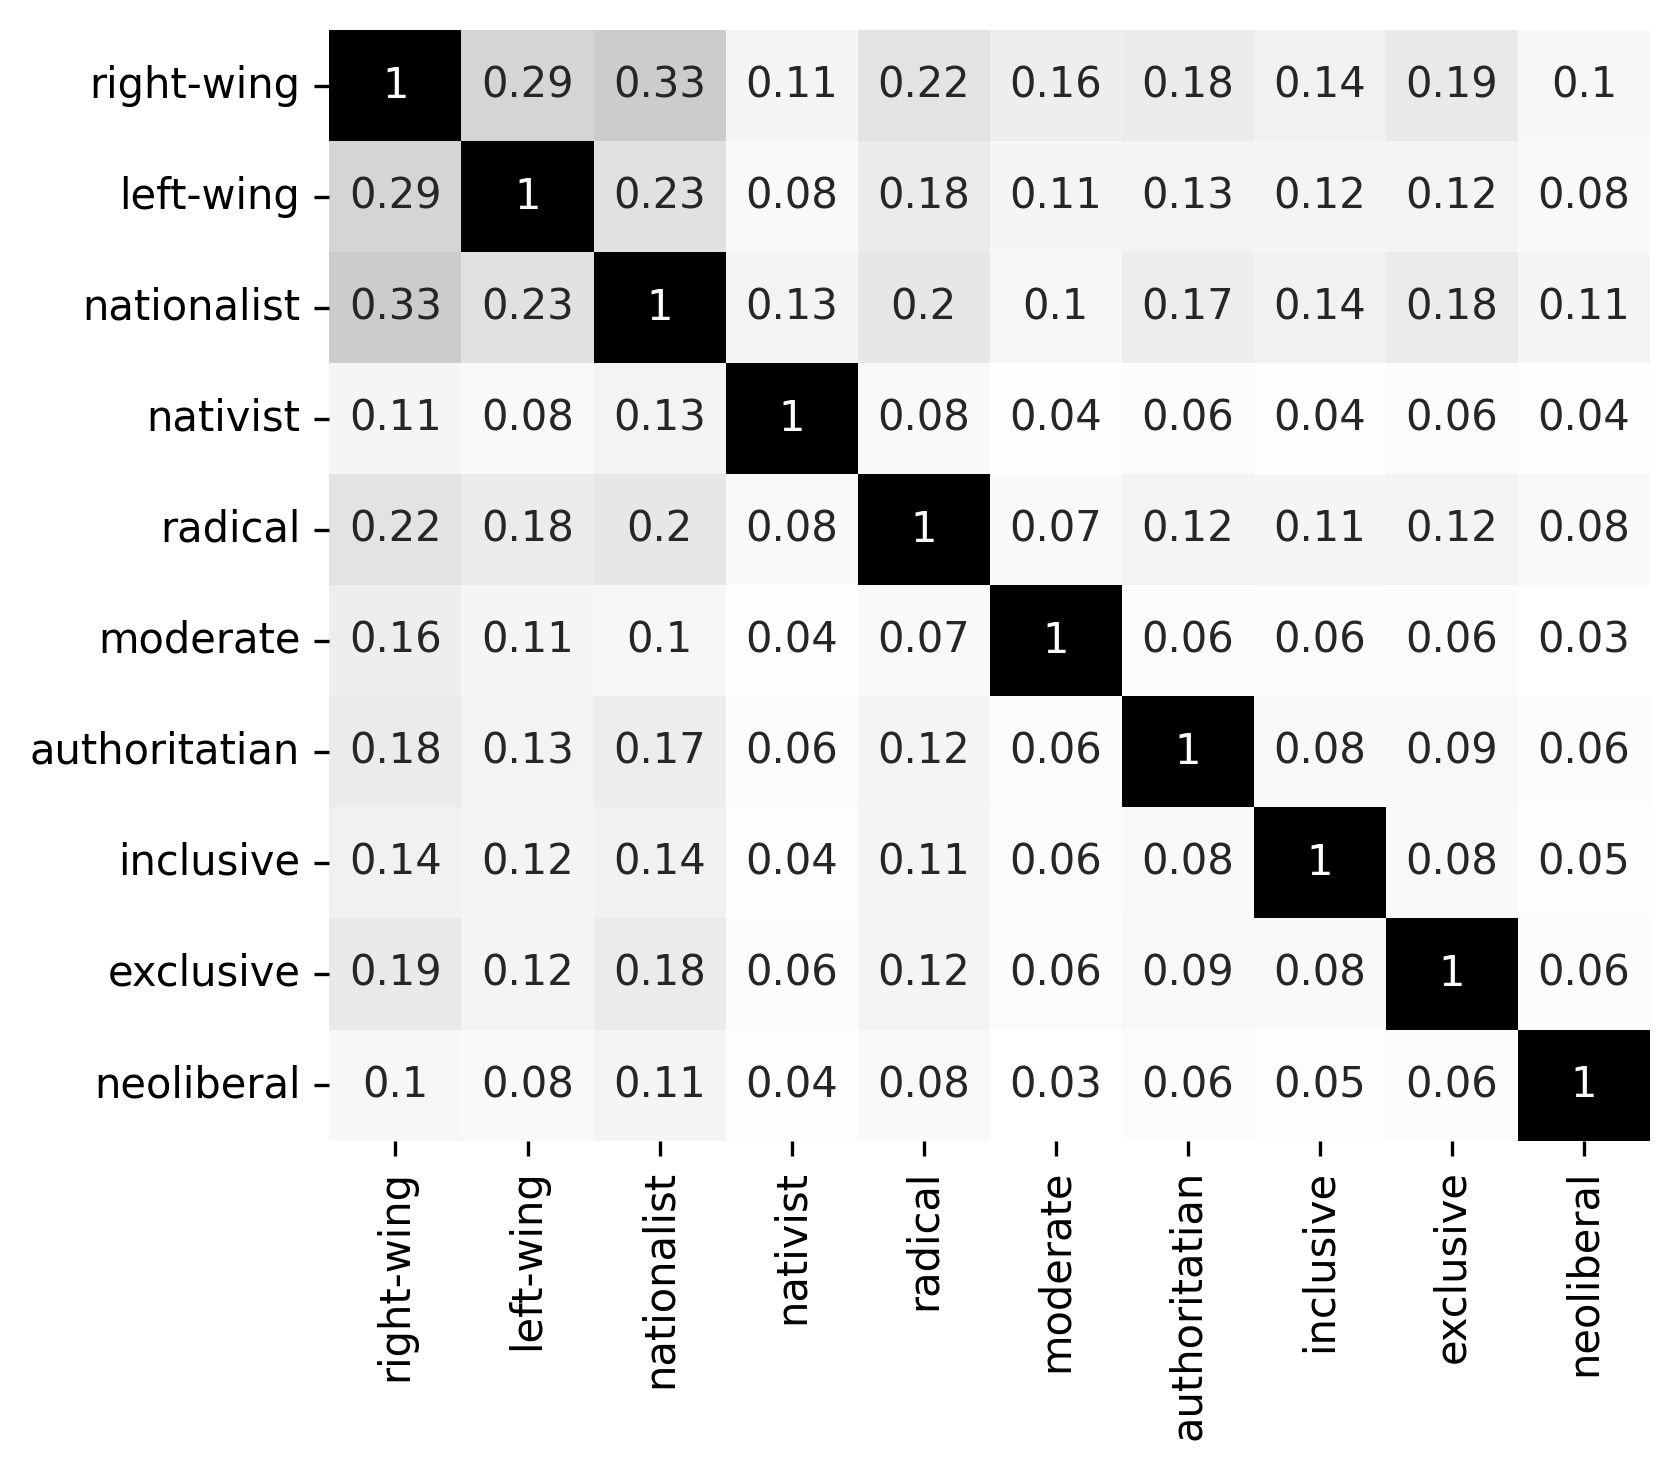

In [179]:
fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)
sns.heatmap(tiidf_cossim, annot=True, cbar=None, cmap="Greys") #  , fmt='d', ax=ax)

In [180]:
fig.savefig("../figures/tfidf_cossim.png")

<AxesSubplot: >

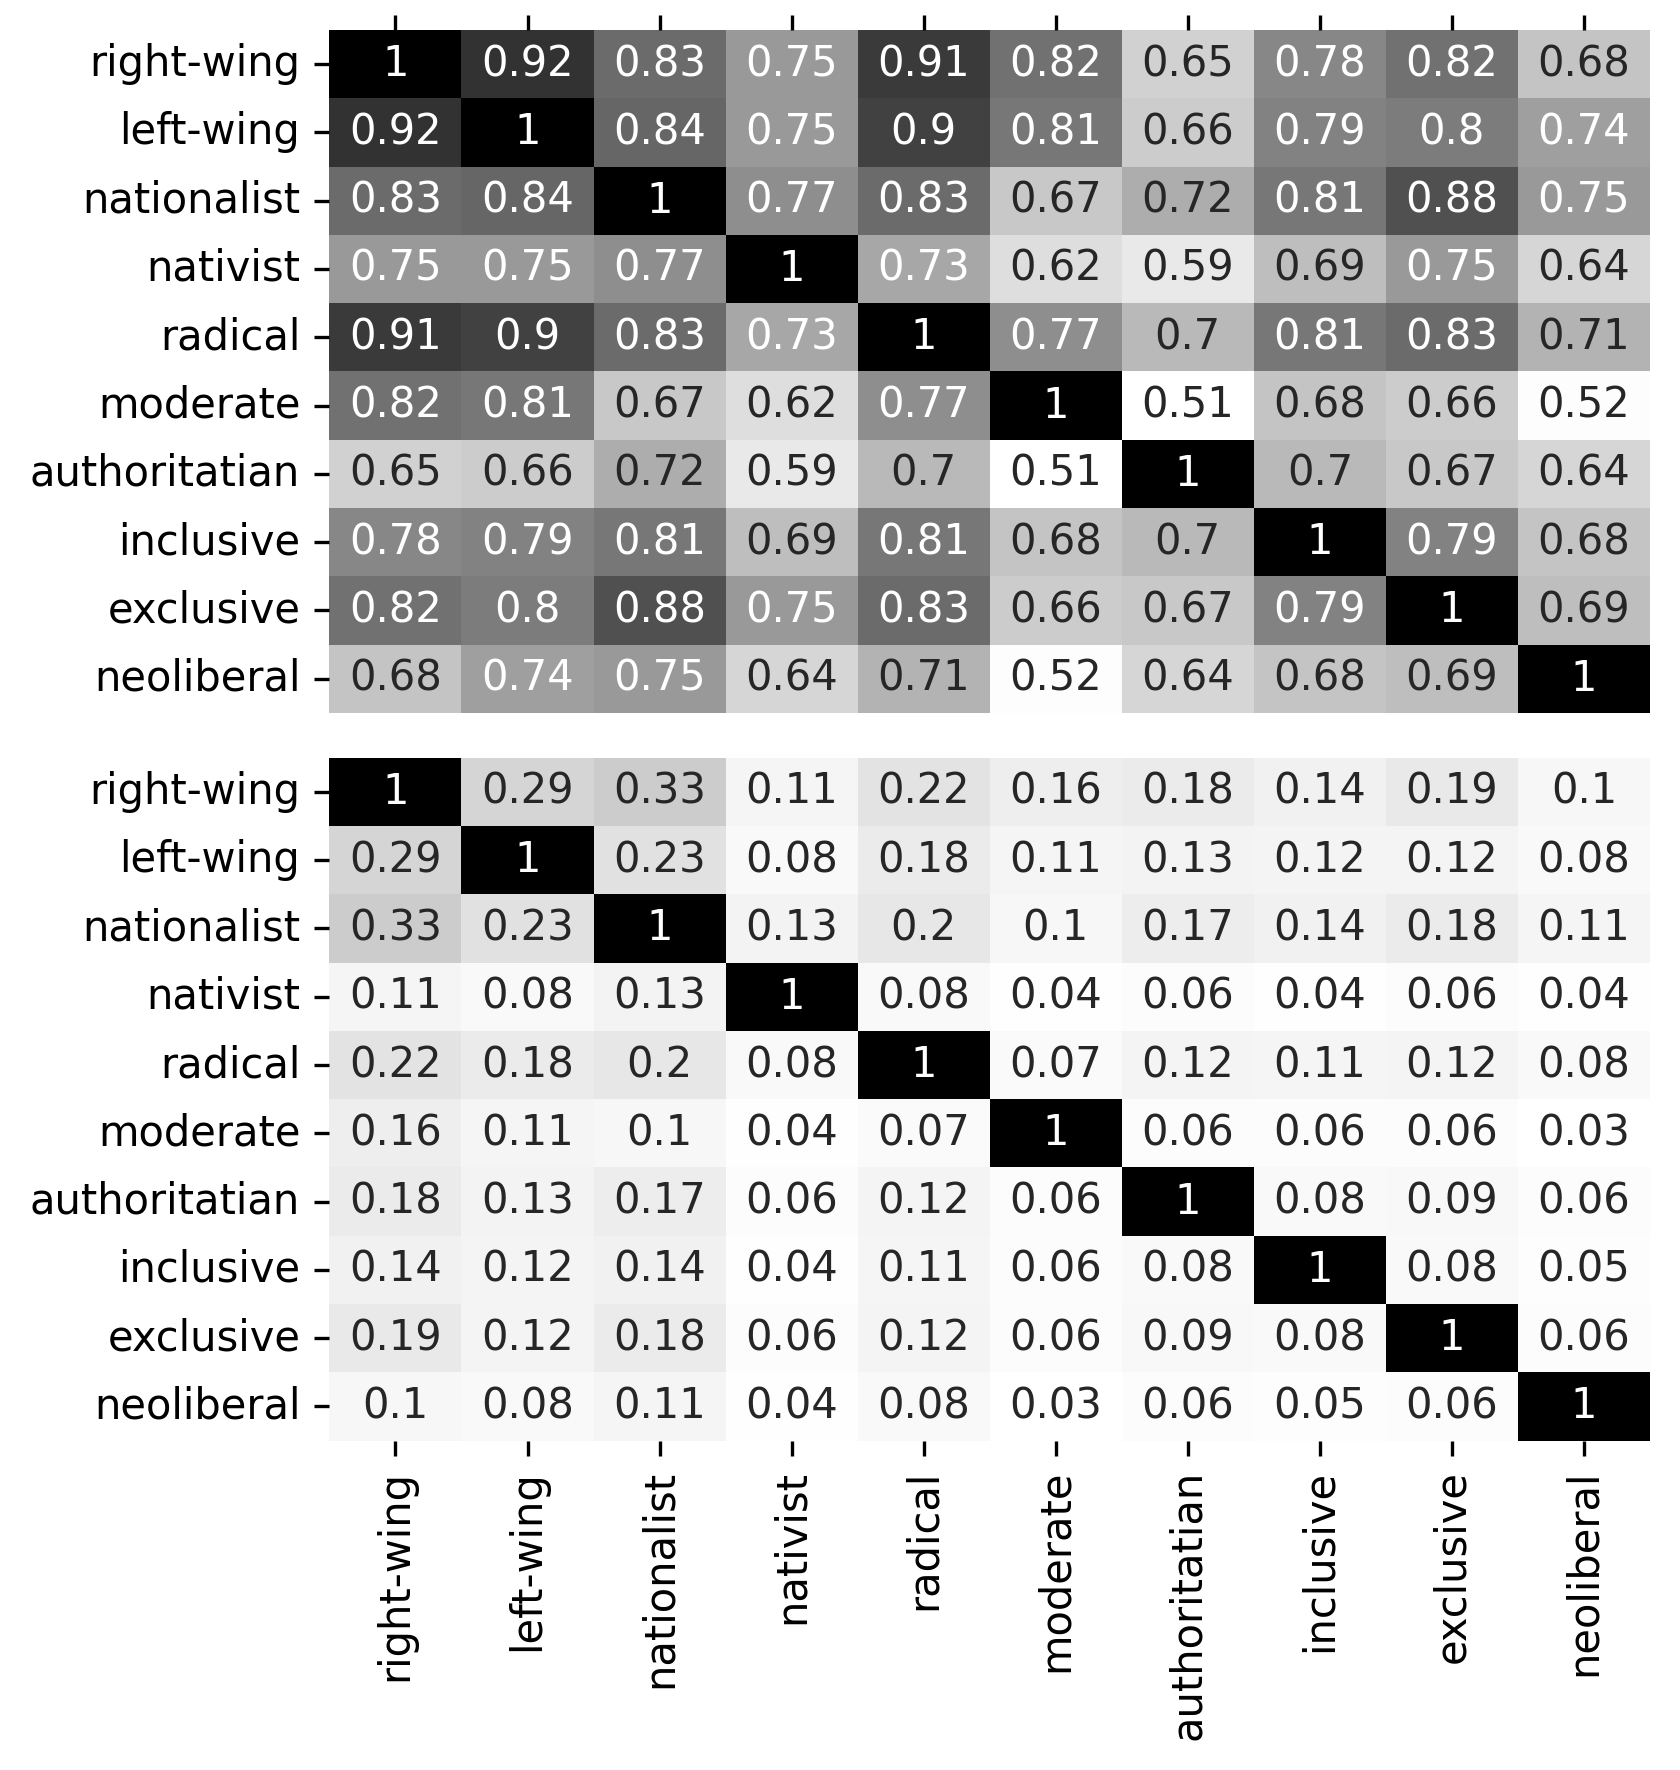

In [178]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(5.7, 6), dpi=300, tight_layout=True)
sns.heatmap(freqs_cossim, annot=True, cbar=None, cmap="Greys", ax=ax1)#  , fmt='d', ax=ax)
ax1.set_xticklabels([])
ax1.xaxis.set_ticks_position('top') # the rest is the same
sns.heatmap(tiidf_cossim, annot=True, cbar=None, cmap="Greys", ax=ax2) #  , fmt='d', ax=ax)

In [171]:
freqs_vals_weighted_df

right-wing  left-wing  nationalist  nativist  radical  \
party                 0.0        0.0          0.0       0.0      0.0   
political             0.0        0.0          0.0       0.0      0.0   
leader                0.0        0.0          0.0       0.0      0.0   
people                0.0        0.0          0.0       0.0      0.0   
support               0.0        0.0          0.0       0.0      0.0   
...                   ...        ...          ...       ...      ...   
vogue                 0.0        0.0          0.0       0.0      0.0   
ponder                0.0        0.0          0.0       0.0      0.0   
stratiﬁcation         0.0        0.0          0.0       0.0      0.0   
unfashionable         0.0        0.0          0.0       0.0      0.0   
neo                   0.0        0.0          0.0       0.0      0.0   

               moderate  authoritatian  inclusive  exclusive  neoliberal  
party               0.0            0.0        0.0        0.0    0.000000  
political           0.0            0.0        0.0        0.0    0.000000  
leader              0.0            0.0        0.0        0.0    0.000000  
people              0.0            0.0        0.0        0.0    0.000000  
support             0.0            0.0        0.0        0.0    0.000000  
...                 ...            ...        ...        ...         ...  
vogue               0.0            0.0        0.0        0.0    0.000534  
ponder              0.0            0.0        0.0        0.0    0.000534  
stratiﬁcation       0.0            0.0        0.0        0.0    0.000534  
unfashionable       0.0            0.0        0.0        0.0    0.000534  
neo                 0.0            0.0        0.0        0.0    0.000534  

[9392 rows x 10 columns]

In [172]:
tf_idf_100_dict = {}
for poptype in poptypes:
    tf_idf_100_dict[poptype] = list(freqs_vals_weighted_df.sort_values(poptype, ascending=False).index[:100])
tf_idf_100_df = pd.DataFrame(tf_idf_100_dict)
tf_idf_100_df

right-wing                                          left-wing  \
0                 cue                                        participant   
1          simplicity                                   anti-imperialist   
2           cognition                                       non-populist   
3             extreme                                               riot   
4            coverage                                           civility   
5       antiimmigrant                                          anarchist   
6             emotion                                      disrespectful   
7               media                                       center-right   
8         participant                                            spanish   
9       communication                                        probability   
10         prominence                                           director   
11            js-self                                        multi-level   
12     re-elaboration                                                  v   
13      effectiveness                                            uncivil   
14                 fi                                            nucleus   
15      anti-politics                                           industry   
16               bias                                                hit   
17               news                                         bolivarian   
18       cancellation                                           activist   
19      victimisation                                       pretreatment   
20         linguistic                                               15-m   
21        susceptible                                    distinctiveness   
22    disrespectfully                                         campaigner   
23              brake                                         reasonably   
24           attitude                                           attitude   
25          religious                                              trade   
26          immigrant                                             centre   
27     anti-immigrant                                          austerity   
28        heroisation                                      left-populist   
29       non-european                                        methodology   
30               rwpp                                        normativity   
31          js-others                                     post-political   
32       experimental                                    governmentality   
33           televise                                            inflect   
34             behave                                               plea   
35           cynicism                                    anti-mainstream   
36           striking  http://www.protothema.gr/news-in-english/artic...   
37               wing               pretreatmentpopulistsintherightpanel   
38             simple                                            inquire   
39             border                                            revenge   
40               seat                                        polemically   
41           property                                          demanding   
42            fascist                                           inasmuch   
43              agent                                         disrespect   
44        demand-side                                        arbitration   
45            deprive                                            t-tests   
46             refuse                                      house-journal   
47           district                                      unproblematic   
48      authoritative                                   redistributional   
49           quadrant                                               3a-b   
50            problem                                             lately   
51           motivate                                      

In [173]:
google_conf.set_with_dataframe(pop_data.add_worksheet("tf_idf_100_df", 1,1), tf_idf_100_df)

In [174]:
tf_idf_100_df.to_csv("../data/tf_idf_100_df.csv")

# Narrow type approach

In [23]:
concs_covered_types_preceding = []
for conc, year, title in all_concs:
    type = ""
    if len(conc) == 21:
        for key in poptypes_dict.keys():
            if conc[9] in poptypes_dict[key]:
                type = key
    concs_covered_types_preceding.append((conc, type, year, title))

In [27]:
concs_covered_types_preceding_df = pd.DataFrame(concs_covered_types_preceding, columns=["conc", "type", "year", "title"])
concs_covered_types_preceding_df = concs_covered_types_preceding_df[concs_covered_types_preceding_df["type"]!=""]
len(concs_covered_types_preceding_df)

3426

In [28]:
concs_covered_types_preceding_df.groupby("type").size()

type
authoritatian     155
exclusive         108
inclusive          64
left-wing         606
moderate           42
nationalist       210
nativist           71
neoliberal         61
radical           104
right-wing       2005
dtype: int64